In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_names_df = pd.read_csv('../data/human+activity/UCI HAR Dataset/UCI HAR Dataset/features.txt', 
                               sep=' ', header=None, names=['column_index', 'column_name'])
feature_names_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [2]:
feature_name = feature_names_df.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [3]:
feature_dup_df = feature_names_df.groupby('column_name').count()
feature_dup_df

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
...,...
tGravityAccMag-max(),1
tGravityAccMag-mean(),1
tGravityAccMag-min(),1


In [4]:
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [5]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                               if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [6]:
feature_name_df = pd.read_csv('../data/human+activity/UCI HAR Dataset/UCI HAR Dataset/features.txt', 
                                  sep=' ', header=None, names=['column_index', 'column_name'])
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


In [7]:
def get_human_dataset():
    feature_name_df = pd.read_csv('../data/human+activity/UCI HAR Dataset/UCI HAR Dataset/features.txt', 
                              sep='\s+', header=None, names=['column_index', 'column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('../data/human+activity/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', 
                          sep='\s+', names=feature_name)
    X_test = pd.read_csv('../data/human+activity/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', 
                         sep='\s+', names=feature_name)
    y_train = pd.read_csv('../data/human+activity/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', 
                          sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('../data/human+activity/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', 
                         sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = get_human_dataset()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [9]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [10]:
y_train.head()

,action
0,5
1,5
2,5
3,5
4,5


In [11]:
y_train.value_counts().sort_index()

action
1         1226
2         1073
3          986
4         1286
5         1374
6         1407
Name: count, dtype: int64

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy : {0:.4f}'.format(accuracy))

Accuracy : 0.8548


In [13]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [18]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('Best Score : ', grid_cv.best_score_)
print('Best Parameters : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score :  0.8513444970102249
Best Parameters :  {'max_depth': 16}


In [15]:
from clf_evaluation import print_eval

estimator = grid_cv.best_estimator_
pred = estimator.predict(X_test)
print_eval(y_test, pred)

Confusion Matrix
[[461  13  22   0   0   0]
 [ 93 353  25   0   0   0]
 [ 22  56 342   0   0   0]
 [  0   0   0 375 116   0]
 [  0   0   0  73 459   0]
 [  0   0   0   0   0 537]]
Accuracy: 0.8575 Precision: 0.8586 Recall: 0.8533
F1: 0.854


In [16]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['rank_test_score', 'mean_test_score', 'param_max_depth']].sort_values(by='rank_test_score').reset_index(drop=True)

,rank_test_score,mean_test_score,param_max_depth
0,1,0.851344,16
1,2,0.851209,10
2,3,0.851069,8
3,4,0.850800,20
4,5,0.850791,6
5,6,0.849440,24
6,7,0.844135,12


In [17]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for max_depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(max_depth, accuracy))

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


In [19]:
params = {
    'max_depth': [8, 12, 16, 20],
    'min_samples_split': [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print(f'Best Score : {grid_cv.best_score_:.4f}')
print(f'Best Parameters : {grid_cv.best_params_}')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Score : 0.8549
Best Parameters : {'max_depth': 8, 'min_samples_split': 16}


In [20]:
best_dt_clf = grid_cv.best_estimator_
pred = best_dt_clf.predict(X_test)
print_eval(y_test, pred)

Confusion Matrix
[[471   9  16   0   0   0]
 [ 75 365  31   0   0   0]
 [ 13  57 350   0   0   0]
 [  0   0   0 371 120   0]
 [  0   0   0  57 475   0]
 [  0   0   0   0   0 537]]
Accuracy: 0.8717 Precision: 0.8727 Recall: 0.8677
F1: 0.8682


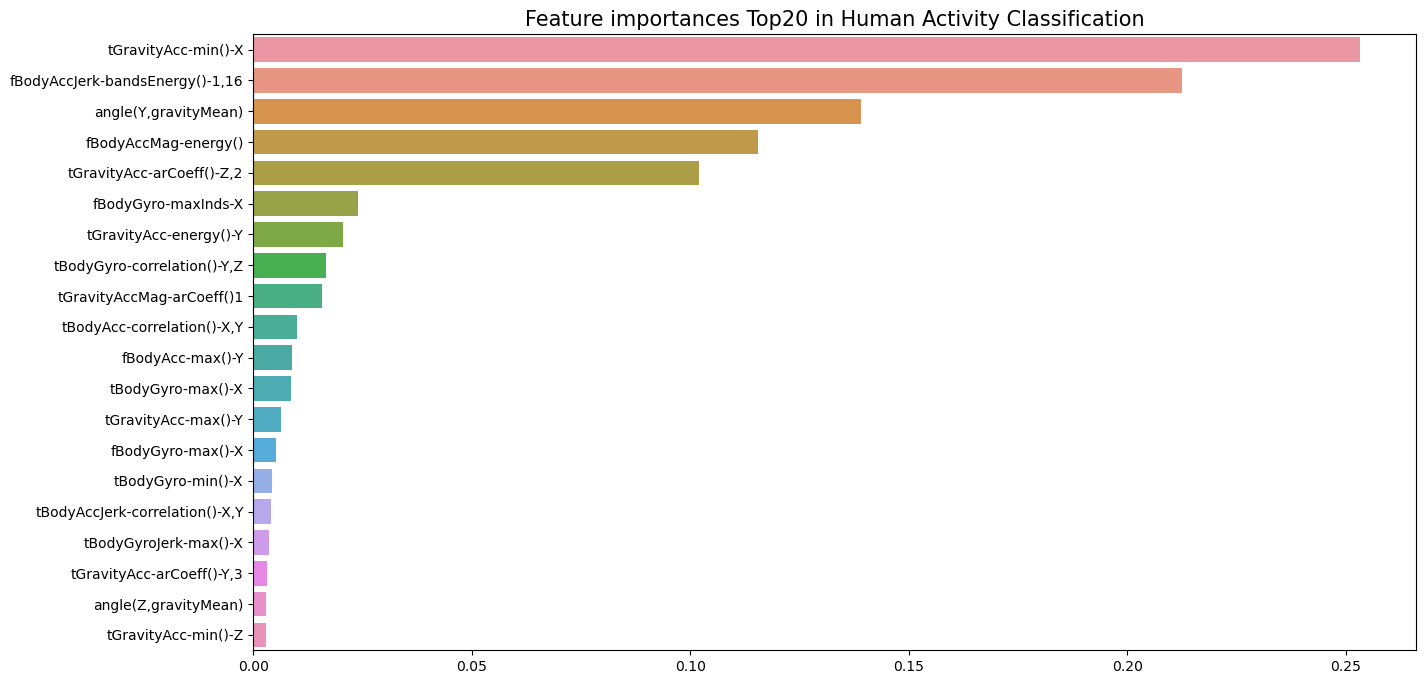

In [25]:
import seaborn as sns

ftr_importances_values = best_dt_clf.feature_importances_
ftr_importances_20 = pd.Series(ftr_importances_values, index=X_train.columns).sort_values(ascending=False)[:20]
plt.figure(figsize=[15,8])
sns.barplot(x=ftr_importances_20.values, y=ftr_importances_20.index)
plt.title('Feature importances Top20 in Human Activity Classification', fontsize=15)
plt.show()